# First Steps

* [Notes](#Notes)
    * [Playback](#Playback)
    * [Pitch](#Pitch)
    * [Duration](#Duration)
    * [Start time](#Start-time)
    * [Notation](#Notation)
* [Chords](#Chords)
    * [Glissandi](#Gliss)
* [Chain: a sequence of notes/chords](#Chain)
    * [Operations on Chains (inverse, reverse, ...)](#Operations-on-Chains)
    * [Offset](#Offset)
* [Voices](#Multiple-Voices)

In [1]:
from maelzel.core import *

csoundengine.magic extension loaded
Magics available: %csound, %%csound, %%definstr


Evaluate this cell to test audio playback

In [2]:
testAudio(period=0.5)



--Csound version 6.18 (double samples) May 25 2022
[commit: 91bdd78bd0a19aacb1ae2f9e08849f79302ff919]
libsndfile-1.0.31
sr = 44100.0, kr = 689.062, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 256 sample-frame blocks
reading 1024-byte blks of shorts from adc:system:capture (RAW)
writing 512 sample blks of 64-bit floats to dac:system:playback
SECTION 1:

Testaudio: pink noise mode
Channel: 1 / 2
Channel: 2 / 2
Channel: 1 / 2
Channel: 2 / 2
Channel: 1 / 2
Channel: 2 / 2
Channel: 1 / 2
Channel: 2 / 2


## Notes

The simplest note possible is just a pitch.

4C
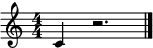

In [2]:
note = Note("C4")
note

### Playback

A Note can be played:

In [4]:
note.play()

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=1)
    Synth(𝍪 preset._piano:1001.0002, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=60 ...)

It can also be recorded to a soundfile

OfflineRenderer(sr=44100)
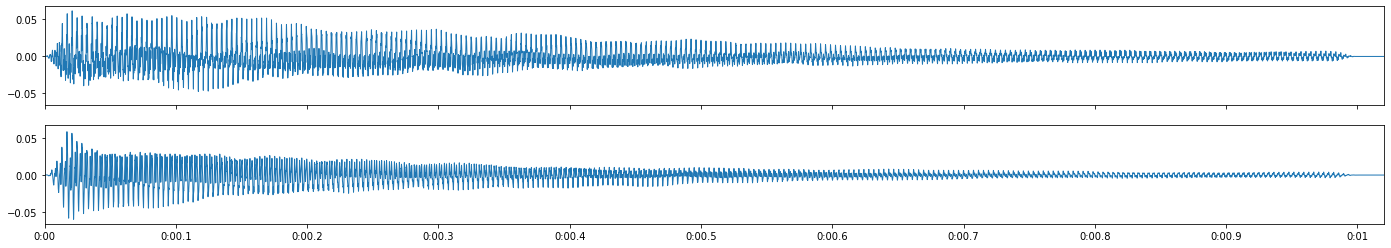

In [3]:
note.rec()

### Pitch

The pitch of a note can be given as a **fractional midinote** or as a **string**. If the pitch deviates from a round 1/8 tone, the cents deviation from the nearest semitone will be shown as a text label (see the 4th note, which is a *E4* 20 cents higher). Pitches can also be given as an absolute frequency and as a frequency deviation from a semitone. **The actual enharmonic representation is not fixed by how the pitch was entered: it depends on the context (surrounding pitches, chords, etc)**.  

**NB**: a `Chain` creates a sequence of notes/chords

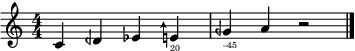

OfflineRenderer(sr=44100)
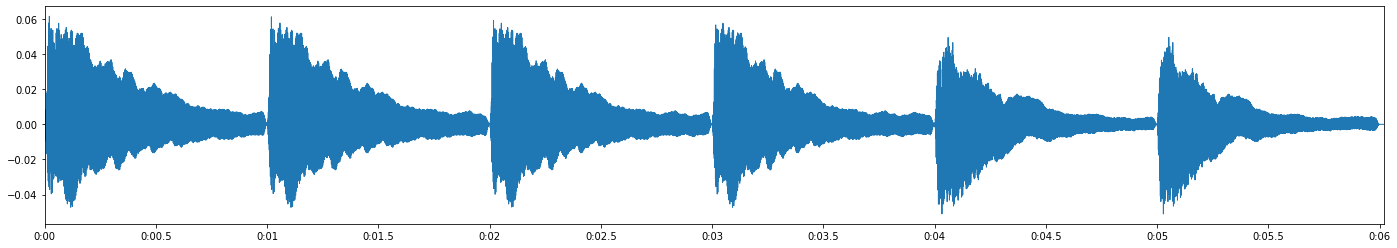

In [5]:
seq = Chain([
    Note(60), 
    Note("c#4+"), 
    Note("4Eb"), 
    Note("4E+20"), 
    Note("4G-10hz"),
    Note("442hz"), 
])
seq.show()
seq.rec(nchnls=1)

#### Transposition

An interval can be added to a note. This will result in a transposed note

4D
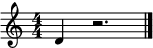

In [6]:
c4 = Note("c4")
c4 + 2

3B+
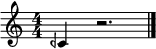

In [7]:
c4 - 0.5

A note can be compared against another note, pitch or string (as long as the string can be interpreted as a notename)

In [8]:
c4 > "b3"

True

In [9]:
c4 < 72

True

### Duration 

**The duration of a Note is given in quarternotes**. This duration is symbolic: its real time duration in seconds depends on tempo.

4G+:2.5♩
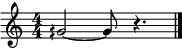

In [9]:
note = Note(67.5, dur=2.5)
note.play()
note

Chain([4C:0.5♩, 4C>:0.5♩, 4C#:0.5♩, 4D+:0.5♩, 4D#:0.5♩, 4G+27:0.5♩])
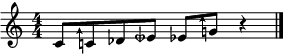

In [4]:
pitches = ("C4", 60.25, "4c#", 62.5, "4Eb", "400hz")
sequence = Chain([Note(p, 0.5) for p in pitches])

# Outside of jupyter you need to call `.show()` in order to display the object. 
# Inside jupyter you can simply set the object as the last line of a cell
sequence

Instead of `.play` we can use `.rec` to render playback to a soundfile. In the case of this notebook this is helpful since the rendered audio will be embedded in the notebook and the result can be played online. For that sole reason we use `.rec` for playback: in your own personal workflow `.play` is probably more convenient

OfflineRenderer(sr=44100)
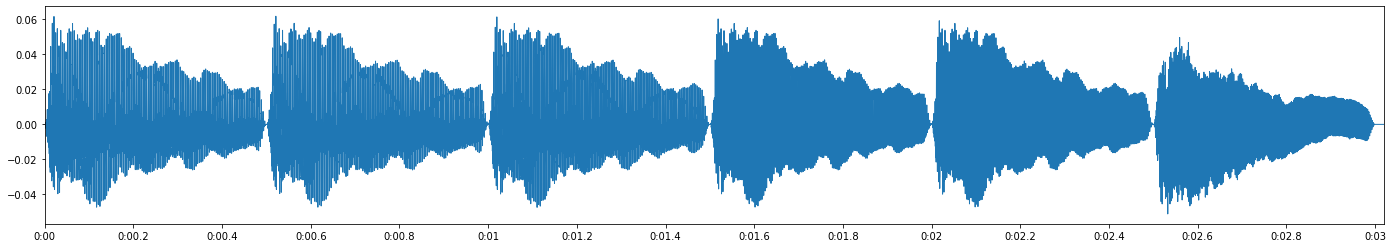

In [12]:
sequence.rec(nchnls=1)

Any duration can be given. For example, **triplets**:

Chain([4C:262Hz:0.333♩:start=0, 4C>:266Hz:0.333♩:start=0.333, 4C#:278Hz:0.333♩:start=0.667, 4D+:303Hz:0.333♩:start=1, 4D#:312Hz:0.333♩:start=1.33, 4G+27:400Hz:0.333♩:start=1.67])
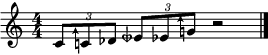

In [20]:
Chain([Note(p, 1/3) for p in pitches])

Or a dotted eighth note of a 7-tuplet

Chain([4C:262Hz:0.429♩:start=0, 4C>:266Hz:0.429♩:start=0.429, 4C#:278Hz:0.429♩:start=0.857, 4D+:303Hz:0.429♩:start=1.29, 4D#:312Hz:0.429♩:start=1.71, 4G+27:400Hz:0.429♩:start=2.14])
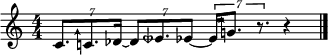

In [21]:
Chain([Note(p, 3/7) for p in pitches])

#### Entering durations in shorthand

When entering notes there are some **shortcuts** possible. For example, when using a string to set the pitch of a note, it is possible to set the duration as well by using the following formats:

    <pitch>:<duration in quarternotes>   
    <pitch>/<musical duration>
    
* In the first format, the duration is given as **quarternotes**, so 0.5 is an eighth note, 0.25 is a 16th note, etc.
* In the second format, the duration is given as **symbol**: 4 represents a quarter-note, 8 represents an 8th-note, 16 a 16th-note, etc. Dots can also be added

Chain([4C:0.5♩, 4C:0.5♩, 4C:0.5♩, 4D:0.75♩, 4D:0.75♩, 4D:0.75♩, 4E:0.25♩, 4E:0.25♩, 4E:0.25♩])
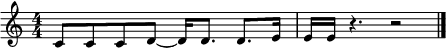

In [5]:
Chain([
    Note("4C", 0.5),
    Note("4C:0.5"), 
    Note("4C/8"),
    
    Note("4D", 0.75),
    Note("4D:.75"),
    Note("4D/8."),
    
    Note("4E", 0.25),
    "4E:.25",           # The string is enough to construct a note within a Chain
    "4E/16", 
])


### Unset duration

Many attributes of a note, like its duration, can be *unset* (set to `None`). When there is a need to determine a duration, for example for notation or playback, a **default duration of 1 quarternote** will be used or **the duration might depend on the context of the note**. For example, within a sequence **a note with unset duration will take the duration from the start time of the next note** if the next note has an explicit start time

In the following example a note *n* with an unset duration is created. When shown independently a default duration of 1 is assumed. When notated in the context of a sequence of notes, the duration is determined by the start time of the following note (if it has a set start time)

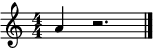

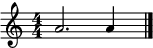

In [8]:
n = Note("4A")
n.show()

Chain([n, n.clone(start=3)]).show()

### Start time

Notes can have an **explicit start time**. This can be useful when there is a need to **sync** with other time-based media, such as an audio file, a video, etc. For notation the quantizer will find the most appropriate subdivision according to your settings (the configuration of notational complexity will be discused later). Playback will respect your given start time, independent of the rounding effects regarding notation.

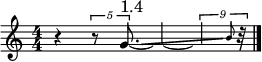

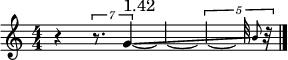

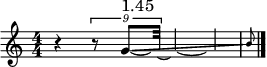

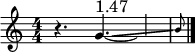

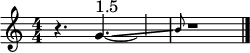

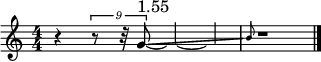

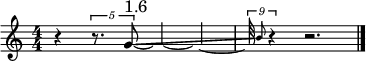

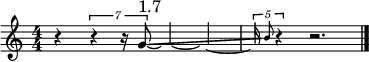

In [26]:
startTimes = [1.4, 1.42, 1.45, 1.47, 1.5, 1.55, 1.6, 1.7]
for start in startTimes:
    n = Note("4G", dur=2.5, start=start, gliss="4B", label=str(start))
    n.show()    

### Notation

There are many **purely notational aspects** of a note which can be customized. A note can have an articulation, a size, color, etc. These aspects are not dealt with in depth here: they are mentioned only to show some of the things that are possible 

4F>:1.4♩:start=0.2
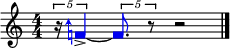

In [12]:
n = Note("4F+25", start=1/5, dur=7/5)
n.setSymbol('color', '#0000f0')
n.setSymbol('notehead', 'square', size=1.3)
n.setSymbol('articulation', 'accent')
n

------

## Chords

A Chord is very similar to a Note but it allows multiple pitches

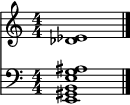

OfflineRenderer(sr=44100)
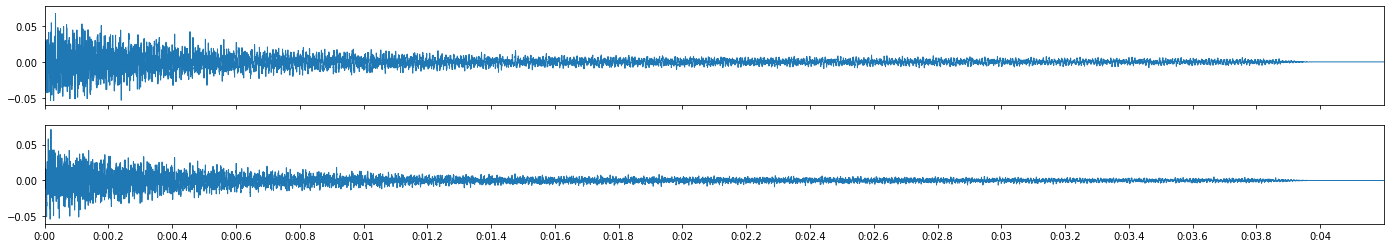

In [6]:
ch = Chord("E2 G#2 B2 E3 G3 Bb3 Db4 Eb4", dur=4)
ch.show()
ch.rec("snd/stravinsky.ogg", fade=(0, 0.2))

The same chord distributed explicitely between two voices

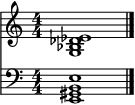

In [7]:
left = Chord("E2 G#2 B2 E3", 4)
right = Chord("G3 Bb3 Db4 Eb4", 4)
score = Score([right, left])
score.show()

A Chord is made out of Notes, so **each note can be given own parameters**.

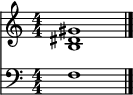

OfflineRenderer(sr=44100)
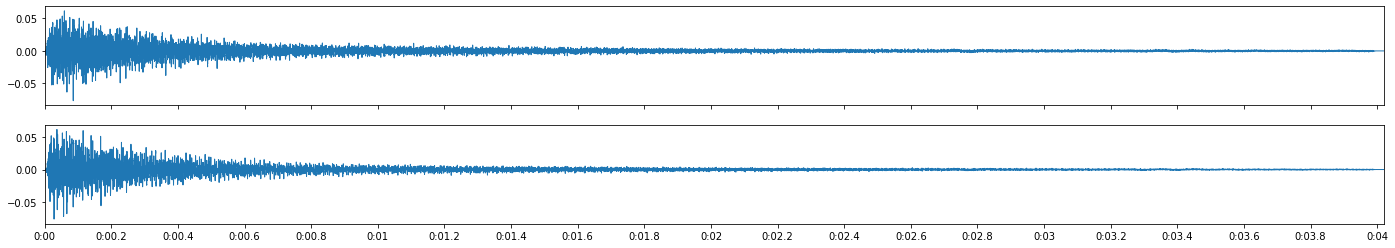

In [9]:
chord = Chord("3f 3b 4d# 4g#", dur=4)
chord.show()

chord.rec("snd/tristan.ogg")

OfflineRenderer(sr=44100)
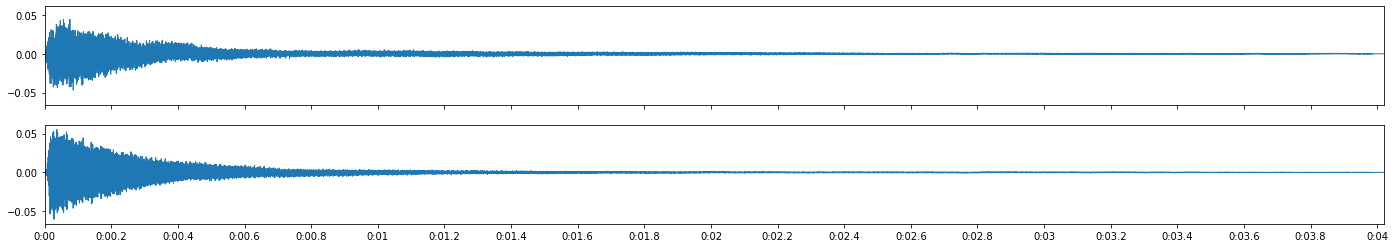

In [11]:
# Make the highest note the loudest and the rest softer
chord[-1].amp = 0.8               

for note in chord[:-1]:
    note.amp = 0.1

chord.rec("snd/chord-with-different-amplitudes.ogg")

Notes within chords are always **sorted from low to high**. Within a chord **each pitch is unique** (there are no unisons)

Notice how in the next example there is only one **D♯ / E♭**

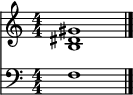

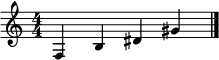

In [8]:
chord = Chord("4D# 3f 3b 4Eb 4g#", dur=4)
chord.show()
Chain(chord.notes).show()

### Glissandi

The pitch of a Note or Chord does not need to be static. In each case it is possible to define a **glissando** (the `.gliss` attribute) for the given duration of the event. 

**NB**: you can set an explicit target for a glissando or you can set the `.gliss` attribute to True, in which case the following event in the sequence determines the target pitch of the glissando

4G:gliss=4B
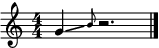

In [12]:
Note("4G", gliss="4B")

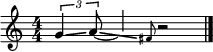

OfflineRenderer(sr=44100)
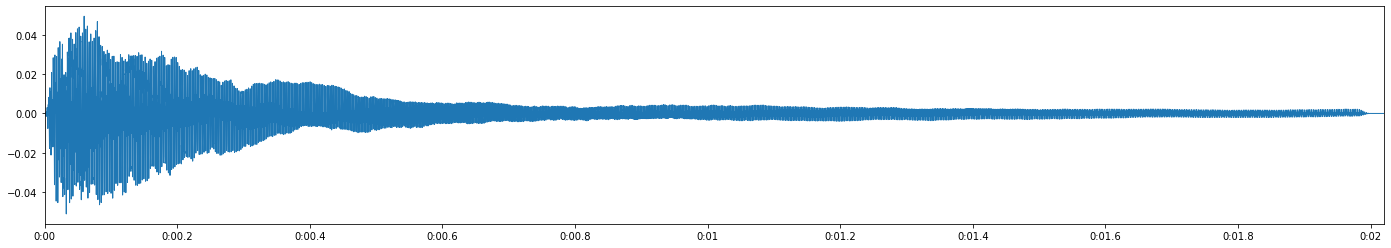

In [13]:
chain = Chain([
    Note("4G", 2/3, gliss=True),
    Note("4A", 4/3, gliss="4F#")
])
chain.show()
chain.rec(nchnls=1)
    

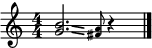

OfflineRenderer(sr=44100)
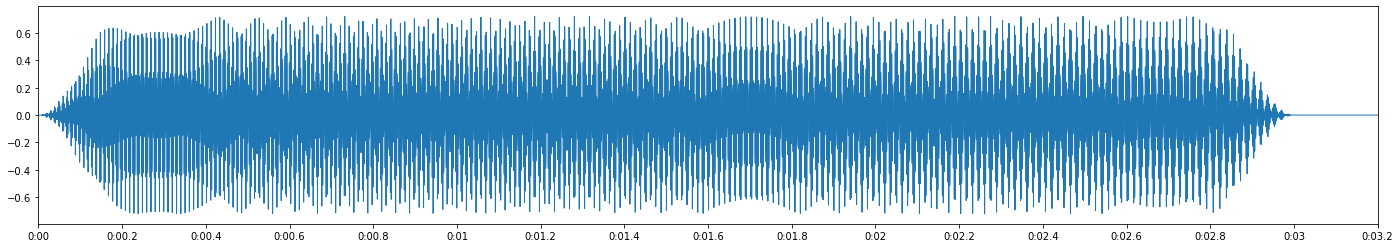

In [14]:
ch = Chord("4G 4B", 3, gliss="4G- 4A")
ch.show()
ch.rec(instr='tri', fade=0.2, nchnls=1)

Series of chord glissandi are also possible. Here we render using a triangular wave

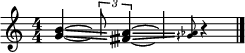

OfflineRenderer(sr=44100)
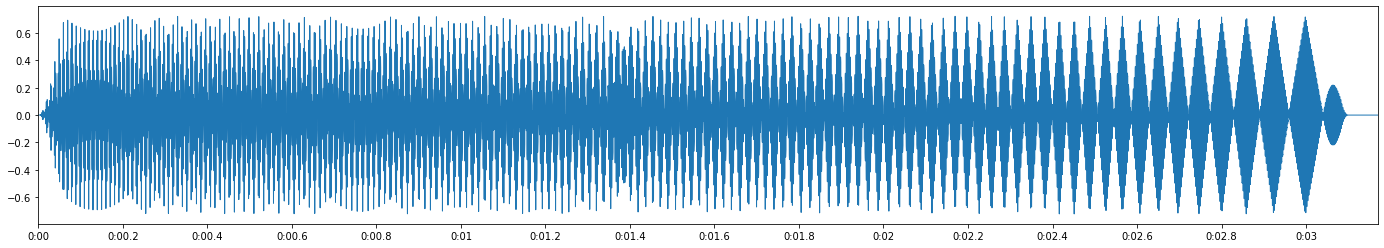

In [15]:
chain = Chain([
    Chord("4G 4B", 4/3, gliss=True),
    Chord("4G- 4A", 5/3, gliss="4G+ 4Ab")
])
chain.show()
chain.rec(instr='tri', fade=0.07, sustain=0.1, nchnls=1)

## Chain

As you have seen in many previous examples, to express a sequence of notes or chords we use a `Chain`

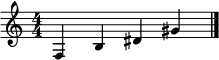

OfflineRenderer(sr=44100)
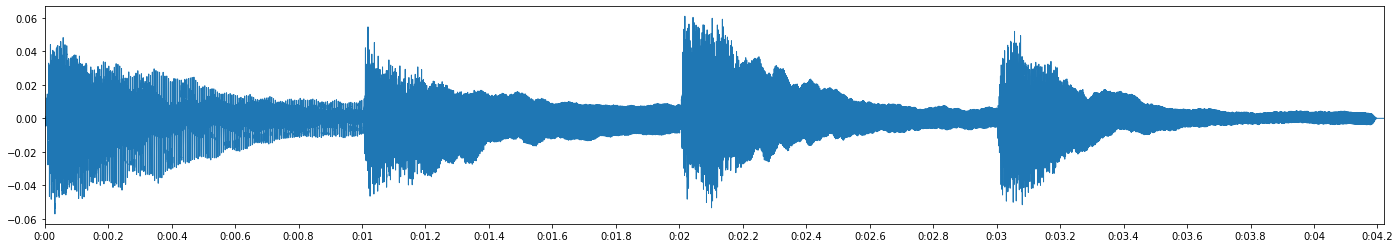

In [16]:
chain = Chain("3f 3b 4Eb 4g#".split())
chain.show()
chain.rec(nchnls=1, sustain=0.2)

Notes within a chain can have **different durations**

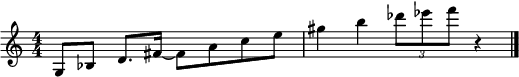

OfflineRenderer(sr=44100)
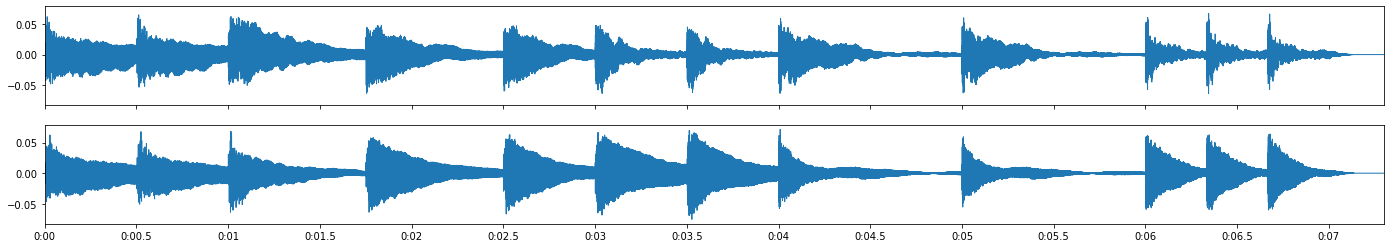

In [21]:
from maelzel.core import *

chain = Chain([
    Note("3G", 0.5),
    Note("3Bb", 0.5),
    Note("4D", 0.75),
    Note("4F#", 0.75),
    Note("4A", 0.5),
    Note("5C", 0.5),
    Note("5E", 0.5),
    Note("5G#", 1),
    Note("5B", 1),
    Note("6C#", 1/3),
    Note("6Eb", 1/3),
    Note("6F", 1/3)
])
chain.show()
# sustain adds an extra duration to the playback. This helps when playing a sequence legato
chain.rec(sustain=0.15, fade=(0, 0.15))

### Operations on Chains

Chains are useful to express operations on a sequence of notes or pitches

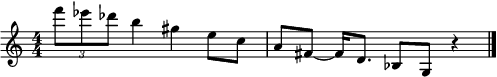

OfflineRenderer(sr=44100)
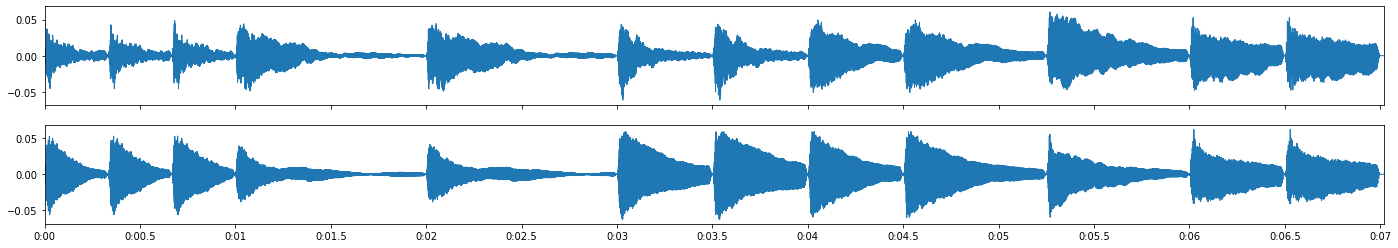

In [22]:
chainReversed = Chain(chain.items[::-1])
chainReversed.show()
chainReversed.rec()


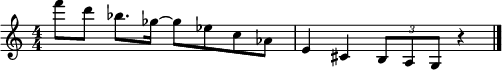

OfflineRenderer(sr=44100)
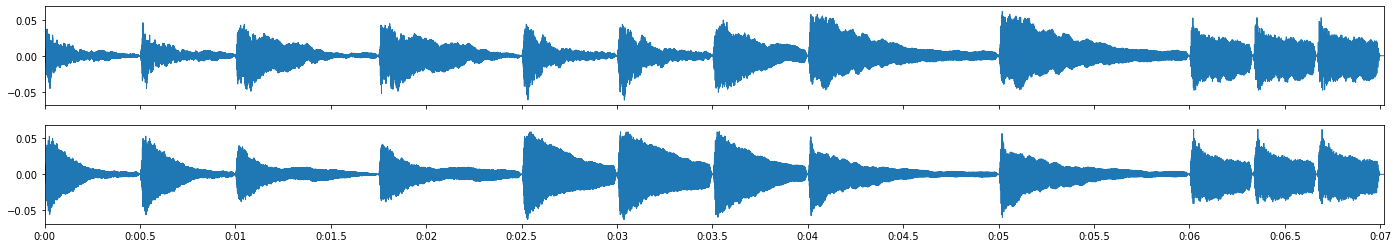

In [23]:
chainInv = chain.invertPitch(pivot="5C")
chainInv.show()
chainInv.rec()

### Offset


Within a Chain, **notes are stacked together**, as long as they do not have an **explicit start time**. A gap within items in a chain can be achieved by either an explicit start time or by a Rest

Any start time within a Chain is interpreted as **relative to the beginning** of the chain.

Chain([4C, 4D:0.5♩, 4E, 4F:2♩:start=5])
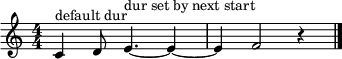

In [11]:
chain = Chain([
    Note("4C", label='default dur'),
    Note("4D", dur=0.5),
    Note("4E", label='dur set by next start'),
    Note("4F", dur=2, start=5)
])
chain

**A chain itself can have an explicit start time**, which is interpreted as an **offset** for all notes/chord within this chain.

Chain([4C, 4D:0.5♩, 4E, 4F:2♩:start=5])
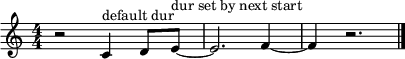

In [10]:
chain = Chain([
    Note("4C", label='default dur'),
    Note("4D", dur=0.5),
    Note("4E", label='dur set by next start'),
    Note("4F", dur=2, start=5)
], start=2)
chain
    

-----------

## Multiple Voices

A **Voice** is similar to a Chain in the sense that it contains a sequence of non-overlapping objects (notes, chords, rests, chains). A Voice corresponds to a staf in a Score. Voices can be stacked together to create a **Score**.

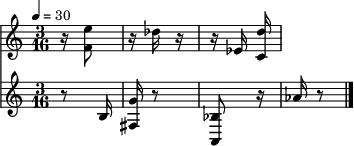

OfflineRenderer(sr=44100)
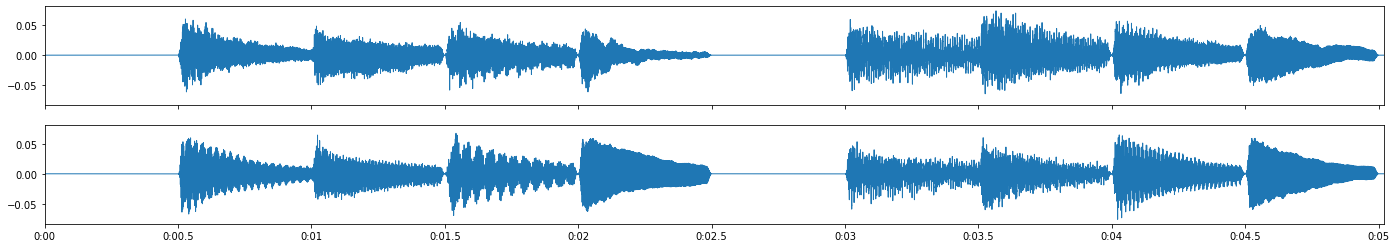

In [25]:
from maelzel.core import *

# It is possible to create notes/chords in a variety of ways

v1 = Voice([
    Rest(0.25), 
    Chord("4F 5E", 0.5),
    Rest(0.25),
    Note("5C#", .25),
    Rest(.5),
    "4Eb:.25",    
    "4C,5D:.25"
])

v2 = Voice([
    "R/8",
    "3B/16",
    "3F#,4G:.25",
    "R/8",
    "2A,3Bb/8",
    "R/16",
    "4G#/16"
])

score = Score([v1, v2])

# Create a score structure with a time signature of 3/16 with tempo ♪. = 40
setScoreStruct(ScoreStruct(timesig=(3, 16), quarterTempo=30))

score.show()
score.rec()